In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikitlearn

ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)
ERROR: No matching distribution found for scikitlearn


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Step1:
Processing Input Data, In this case we will simply generate input data using numpy.

Lets take height and weight of 30 people

In [3]:
import numpy as np
import pandas as pd

def generate_adult_data(num_samples, min_age=30):
    data = []
    for _ in range(num_samples):
        # Realistic height generation (adjust means and stds based on population data)
        height_cm = np.random.normal(170, 7)  # Example: Mean 170cm, std dev 7cm.  Adjust these!!!
        height_feet = height_cm * 0.0328084

        # Weight generation correlated with height and age (more sophisticated)
        # This is a simplified example.  Real-world weight is influenced by many factors.
        base_weight = (height_cm - 100)  # A very rough estimate, adjust this relationship
        weight_variation = np.random.normal(0, 10)  # Add some random variation
        weight_kg = base_weight + weight_variation

        # Ensure weight is not negative
        weight_kg = max(1, weight_kg) # set the floor to 1 kg

        bmi = weight_kg / (height_cm / 100)**2

        # More nuanced obesity classification (adjust thresholds as needed)
        if bmi < 18.5:
            obese = "Normal"
        elif bmi < 25:
            obese = "Normal"
        elif bmi < 30:
            obese = "Obese"
        else:
            obese = "Obese"

        data.append([0,height_feet, weight_kg, obese])

    return pd.DataFrame(data, columns=["Age", "Height in feet", "Weight in Kg", "Obese or not"])


# Generate 1000 samples
num_samples = 200
df = generate_adult_data(num_samples)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/content/height_weight_balanced_obese_samples.csv")

In [7]:
# prompt: split dataframe into 2 dataframes based on column value

df_obese = df[df.iloc[:,3] == "Obese"]
df_healthy = df[df.iloc[:,3] == "Normal"]

non_obese_height = df_healthy.iloc[:,1].to_numpy()   #np.random.normal(loc=5.5,size=30,scale=0.5)
non_obese_weight = df_healthy.iloc[:,2].to_numpy() #np.random.normal(loc=60,size=30,scale=2.5)
obese_height = df_obese.iloc[:,1].to_numpy()
obese_weight = df_obese.iloc[:,2].to_numpy()


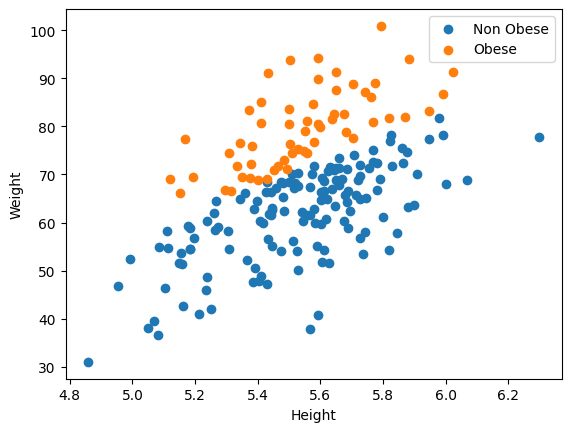

In [8]:
plt.scatter(non_obese_height,non_obese_weight)
plt.scatter(obese_height,obese_weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Non Obese","Obese"])
plt.show()

#Step 2
Space of All possible solutions(Hypothesis)

For x -> Hypothesis -> Y

Lets Build a classifier line that separates people who are obese and not. It can be a straight line that separates both categories

Linear algebra equation for a straight line
ax+by+c=0
x = height
y = weight

This is a standard form of line

https://www.youtube.com/watch?v=-DnmoFnQUtk



In [22]:
non_obese_arr = np.array([non_obese_height,non_obese_weight])
obese_arr= np.array([obese_height,obese_weight])

obese_arr_data = np.array([list(row) for row in zip(obese_arr[0], obese_arr[1])])
non_obese_arr_data = np.array([list(row) for row in zip(non_obese_arr[0], non_obese_arr[1])])

data = np.vstack((obese_arr_data, non_obese_arr_data))
#labels = np.hstack((np.zeros(len(obese_arr_data)), np.ones(len(non_obese_arr_data))))
labels = np.hstack((np.array(["Obese"] * len(obese_arr_data), dtype=object), np.array(["Healthy"] * len(non_obese_arr_data), dtype=object)))




In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [24]:
print(X_train)
print(y_train)

[[  5.8654713   72.42833623]
 [  5.87602649  74.67402161]
 [  5.37077631  83.36014941]
 [  5.57700469  84.59310503]
 [  5.40271153  47.80237328]
 [  5.74486617  65.13595489]
 [  5.77389195  89.02916944]
 [  5.59338387  80.51198221]
 [  5.36051334  66.15489138]
 [  5.06819063  39.49797811]
 [  5.41659349  59.93934461]
 [  5.72055552  68.87656178]
 [  5.81915098  81.67950643]
 [  5.17679902  59.29419676]
 [  5.43509102  61.75639306]
 [  5.72650048  56.74062661]
 [  5.27185542  59.01249304]
 [  5.44457127  62.55830828]
 [  5.43240567  56.63535758]
 [  5.43030618  47.16560971]
 [  5.54243617  62.21992924]
 [  5.72571091  71.93921635]
 [  5.15079062  66.13681292]
 [  5.50443872  93.78872831]
 [  5.76022905  86.08863951]
 [  5.08166304  36.50070485]
 [  5.70293965  88.84449088]
 [  5.30893458  54.51827812]
 [  5.89772746  63.62648969]
 [  5.19669124  56.81375424]
 [  5.29635972  66.80074257]
 [  5.60354824  59.73197149]
 [  5.3900681   50.63291831]
 [  5.99168053  86.70410953]
 [  5.18357059

In [25]:
print(X_test)
print(y_test)

[[ 5.88103001 63.15029678]
 [ 5.50953227 74.56553382]
 [ 5.35027395 69.38408948]
 [ 5.70769547 73.9904774 ]
 [ 5.54485249 60.38569856]
 [ 5.60398035 51.8841044 ]
 [ 5.99250731 78.26136081]
 [ 5.57998297 71.68149121]
 [ 5.68644802 64.29634976]
 [ 5.59121555 89.80055889]
 [ 5.52769162 70.34791777]
 [ 5.52785397 67.67168597]
 [ 5.48128473 68.19105196]
 [ 5.21269523 40.94441892]
 [ 5.82022913 54.17919141]
 [ 5.52925458 50.05635402]
 [ 5.60044897 79.95632685]
 [ 5.60303913 66.38233358]
 [ 5.8229809  77.01986985]
 [ 5.2388278  60.41505361]
 [ 5.77937506 72.29355711]
 [ 5.64237877 82.49960021]
 [ 5.44525411 55.20540757]
 [ 5.65850604 67.82744205]
 [ 5.30439359 58.32015216]
 [ 5.68622843 71.18967659]
 [ 5.80084664 61.23876961]
 [ 5.62381846 70.6307573 ]
 [ 5.18538482 58.77098783]
 [ 5.69450953 62.41175534]
 [ 5.33262627 71.82866537]
 [ 5.64864427 87.62609764]
 [ 5.70449168 77.53290022]
 [ 5.94593974 77.37462389]
 [ 5.59117063 40.74581955]
 [ 5.67811375 65.65084475]
 [ 4.85893196 30.99130662]
 

#Step 3:
#Finding right solution
Since we can have number of lines, we should always find a line which best fits (separates diff categories like obese and non obese)

One of the properties of linear equation ax+by+c=0 is for a given a,b,c. If we try to replace a (x,y) value in above equation, it will be either a positive or a negative number
So for a random a,b,c values, if we put our (height,weight) we should always get a positive number or a negative number
So if the line eq is perfect then all our obese data points will be completely positive then non_obese data points will be completely negative respectively or vice versa

ideally if we find a best line which better satisfies above condition

This is also called **Loss Function** calculation. And loss should be minimal

In [53]:
def compute_error(X_train, y_train,coefficients,constant):
  error = 0
  for idx,item in enumerate(X_train):
    height = item[0]
    weight = item[1]
    train_val = y_train[idx]

    #print("Predicted: "+str((coefficients[0]*height+coefficients[1]*weight+constant))+"   "+"Actual: "+str(train_val))

    if (coefficients[0]*height+coefficients[1]*weight+constant) <=0 and train_val=="Obese":
      error += 1
    elif (coefficients[0]*height+coefficients[1]*weight+constant) > 0 and train_val=="Healthy":
      error += 1
  return error

#Step 4: Find the Best Algorithm:
In this step we consume dataset and then generate a best hypothesis

#Step 5: Run Algorithm

In [48]:
def random_linear_classifier(X_train, y_train, k, d):
  best_coefficients = None
  best_constant = None
  best_error = float('inf')

  for i in range(k):
    coefficients = np.random.normal(size=2) #[2.3,-0.3]
    constant = np.random.normal() #8.7

    #print(str(a_b) + "  " + str(c))

    error = compute_error(X_train,y_train,coefficients,constant)
    if error < best_error:
      print("Iteration: "+str(i)+"  Error:"+str(error))
      best_coefficients = coefficients
      best_constant = constant
      best_error = error

  print("---------------------")
  print(best_coefficients)
  print(best_constant)
  print(best_error)
  return best_coefficients,best_constant


In [57]:
k = 10000
best_coefficients,best_constant = random_linear_classifier(X_train,y_train,k,2)

Iteration: 0  Error:110
Iteration: 1  Error:50
Iteration: 19  Error:12
Iteration: 3842  Error:8
---------------------
[-1.43333844  0.10307962]
0.6046551338380255
8


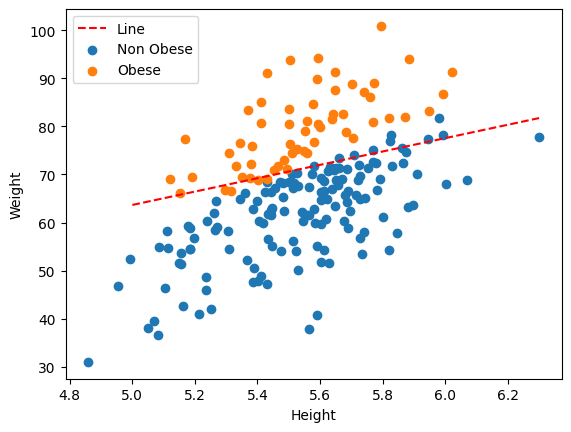

In [58]:
x = np.linspace(5, 6.3, 100)
# Calculate corresponding y values for the line
y = (-best_coefficients[0] * x - best_constant) / best_coefficients[1] #(-a * x - c) / b

# Plot the line
plt.plot(x, y,color="red", linestyle="--",label="Decision Boundry")


plt.scatter(non_obese_height,non_obese_weight)
plt.scatter(obese_height,obese_weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Line","Non Obese","Obese"])
#plt.xlim(0)  # Set the lower limit of the x-axis to 0
#plt.ylim(0)  # Set the lower limit of the y-axis to 0
plt.show()

#Step 6: validate results
Lets take a new height and weight and try to find if it is obese or not

In [64]:
def test_linear_classifier(height, weight):
    # Calculate the predicted BMI using the linear classifier
    predicted_bmi = best_coefficients[0] * height + best_coefficients[1] * weight + best_constant

    # Classify the person as obese or not based on the predicted BMI
    if predicted_bmi >= 0:
        return "Obese"
    else:
        return "Healthy"


for idx,item in enumerate(X_test):
    height = item[0]
    weight = item[1]
    test_val = y_test[idx]

    print("Weight: "+str(weight)+" height: "+str(height) +"Predicted:"+ test_linear_classifier(height,weight)+"  Actual:"+test_val)

Weight: 63.150296784409804 height: 5.881030010475042Predicted:Healthy  Actual:Healthy
Weight: 74.56553381526408 height: 5.50953227479157Predicted:Obese  Actual:Obese
Weight: 69.3840894776597 height: 5.350273945047734Predicted:Obese  Actual:Obese
Weight: 73.99047739917675 height: 5.707695466321335Predicted:Obese  Actual:Healthy
Weight: 60.38569856195659 height: 5.544852488629451Predicted:Healthy  Actual:Healthy
Weight: 51.88410440161449 height: 5.603980353218132Predicted:Healthy  Actual:Healthy
Weight: 78.26136080628142 height: 5.992507306237157Predicted:Obese  Actual:Healthy
Weight: 71.68149120862826 height: 5.579982969801975Predicted:Healthy  Actual:Healthy
Weight: 64.29634975555359 height: 5.686448024811301Predicted:Healthy  Actual:Healthy
Weight: 89.80055889234876 height: 5.5912155499592Predicted:Obese  Actual:Obese
Weight: 70.34791776500525 height: 5.527691618040534Predicted:Healthy  Actual:Healthy
Weight: 67.67168596889415 height: 5.527853974735674Predicted:Healthy  Actual:Healthy

#Discuss about Hyper parameters
#Discuss about loss functions
#Discuss about Math, possible use of np.dot()